<a href="https://colab.research.google.com/github/Raqueljrp/Dise-o-Experimental/blob/main/Superficie_de_Respuesta_FORMS10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2025**
# **Formato para Trabajar en Colab 2025**
# **Escribe el Nombre del Curso**: Diseno de Experimentos
## **Escribe tu nombre completo**: Raquel Jimena Rey Prada
> Email: rrey@utb.edu.co

> Celular:3006613549

> Código Estudiantil: T00057965

> Link GitHub:

## **TEMA: Superficie de respuesta**

**Ejercicio 26:**
Se busca encontrar los niveles de tiempo (W1) y temperatura (W2) que maximizan el rendimiento de un proceso. Las condiciones actuales son W1 = 75 minutos y de W2 = 130°C. Para explorar la superficie de respuesta en torno a estos valores se corre el siguiente diseño experimental.

| Condiciones reales | Condiciones reales | Condiciones codificadas | Condiciones codificadas |      |
|--------------------|--------------------|--------------------------|--------------------------|------|
| **W₁** | **W₂** | **X₁** | **X₂** | **Y** |
| 70 | 127.5 | -1 | -1 | 54.3 |
| 80 | 127.5 | 1  | -1 | 60.3 |
| 70 | 132.5 | -1 | 1  | 64.6 |
| 80 | 132.5 | 1  | 1  | 68.0 |
| 75 | 130.0 | 0  | 0  | 60.3 |
| 75 | 130.0 | 0  | 0  | 64.3 |
| 75 | 130.0 | 0  | 0  | 62.3 |


In [ ]:
import pandas as pd

data = {
    "W1": [70, 80, 70, 80, 75, 75, 75],
    "W2": [127.5, 127.5, 132.5, 132.5, 130.0, 130.0, 130.0],
    "X1": [-1, 1, -1, 1, 0, 0, 0],
    "X2": [-1, -1, 1, 1, 0, 0, 0],
    "Y":  [54.3, 60.3, 64.6, 68.0, 60.3, 64.3, 62.3]
}

df = pd.DataFrame(data)
df


,W1,W2,X1,X2,Y
0,70,127.5,-1,-1,54.3
1,80,127.5,1,-1,60.3
2,70,132.5,-1,1,64.6
3,80,132.5,1,1,68.0
4,75,130.0,0,0,60.3
5,75,130.0,0,0,64.3
6,75,130.0,0,0,62.3


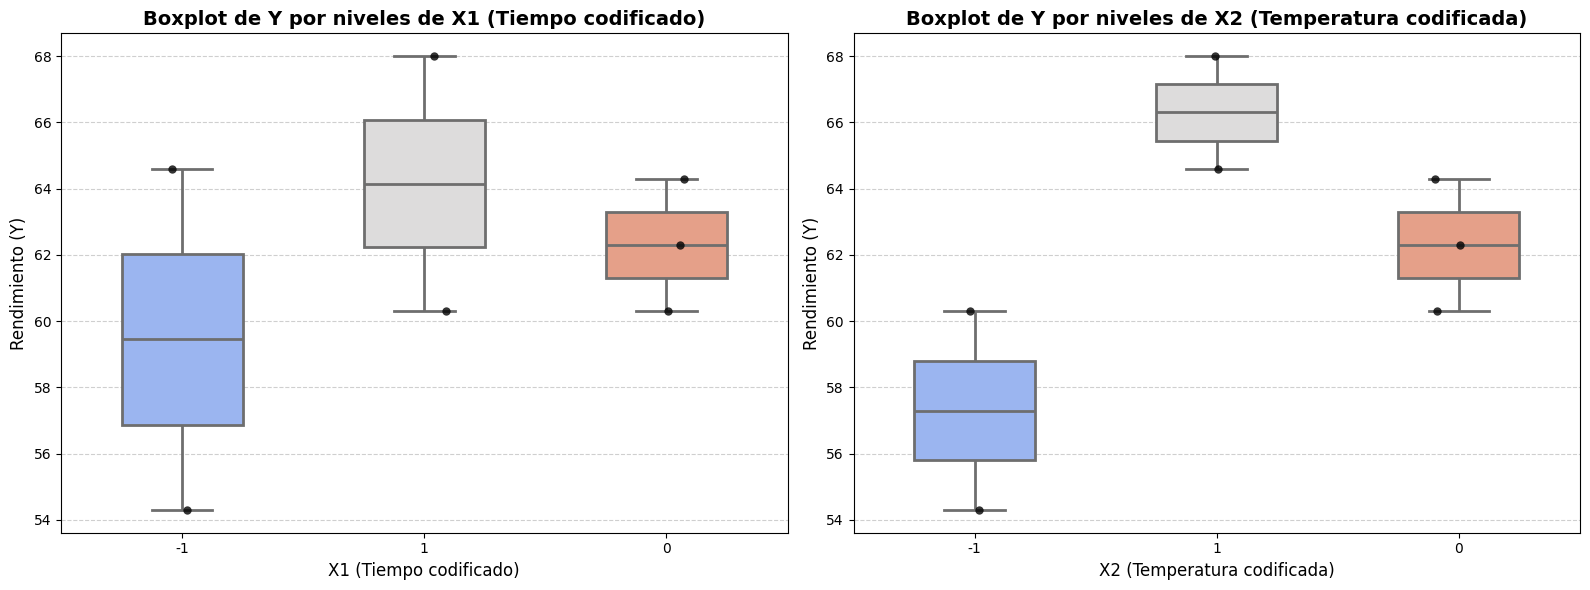

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-define the DataFrame 'df' here to ensure the correct data is used
# This prevents issues if 'df' was overwritten by other cells
data = {
    "W1": [70, 80, 70, 80, 75, 75, 75],
    "W2": [127.5, 127.5, 132.5, 132.5, 130.0, 130.0, 130.0],
    "X1": [-1, 1, -1, 1, 0, 0, 0],
    "X2": [-1, -1, 1, 1, 0, 0, 0],
    "Y":  [54.3, 60.3, 64.6, 68.0, 60.3, 64.3, 62.3]
}
df = pd.DataFrame(data)


# Convert X1 and X2 to tipo categórico para una mejor visualización en el boxplot
# Se crea una copia para evitar SettingWithCopyWarning
df_plot = df.copy()
df_plot['X1_cat'] = df_plot['X1'].astype(str)
df_plot['X2_cat'] = df_plot['X2'].astype(str)

# Crear dos subgráficos para X1 y X2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot para Y vs X1
sns.boxplot(
    x="X1_cat", y="Y", data=df_plot,
    palette="coolwarm", width=0.5,
    linewidth=2, fliersize=6, ax=axes[0],
    hue="X1_cat", legend=False # Añadido 'hue' y 'legend=False' para abordar la advertencia de futuras versiones de seaborn
)
sns.stripplot(
    x="X1_cat", y="Y", data=df_plot,
    color="black", size=6, jitter=True, alpha=0.8, ax=axes[0]
)
axes[0].set_title("Boxplot de Y por niveles de X1 (Tiempo codificado)", fontsize=14, weight="bold")
axes[0].set_xlabel("X1 (Tiempo codificado)", fontsize=12)
axes[0].set_ylabel("Rendimiento (Y)", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.6)

# Boxplot para Y vs X2
sns.boxplot(
    x="X2_cat", y="Y", data=df_plot,
    palette="coolwarm", width=0.5,
    linewidth=2, fliersize=6, ax=axes[1],
    hue="X2_cat", legend=False # Añadido 'hue' y 'legend=False' para abordar la advertencia de futuras versiones de seaborn
)
sns.stripplot(
    x="X2_cat", y="Y", data=df_plot,
    color="black", size=6, jitter=True, alpha=0.8, ax=axes[1]
)
axes[1].set_title("Boxplot de Y por niveles de X2 (Temperatura codificada)", fontsize=14, weight="bold")
axes[1].set_xlabel("X2 (Temperatura codificada)", fontsize=12)
axes[1].set_ylabel("Rendimiento (Y)", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

modelo1 = ols("Y ~ (X1+X2)**2", data = df).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

           df     sum_sq    mean_sq          F    PR(>F)
X1        1.0  22.090000  22.090000   7.862542  0.067627
X2        1.0  81.000000  81.000000  28.830508  0.012646
X1:X2     1.0   1.690000   1.690000   0.601525  0.494523
Residual  3.0   8.428571   2.809524        NaN       NaN


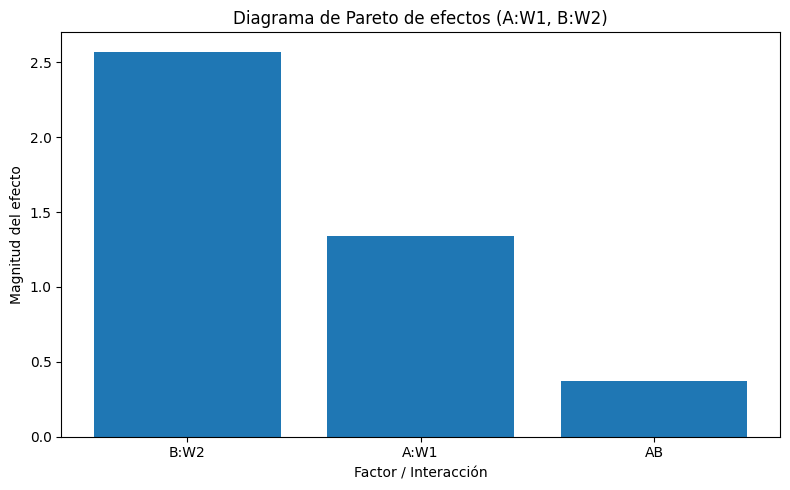

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurar que df ya existe (de la celda anterior)
# df contiene: W1, W2, X1, X2, Y

# ---------------------------------------------------
# 1. Calcular efectos principales e interacción
# ---------------------------------------------------
effects = {}

# Efecto de X1
effects["A:W1"] = abs((df["X1"] * df["Y"]).mean())

# Efecto de X2
effects["B:W2"] = abs((df["X2"] * df["Y"]).mean())

# Efecto de interacción X1 * X2
effects["AB"] = abs((df["X1"] * df["X2"] * df["Y"]).mean())

# ---------------------------------------------------
# 2. Ordenar efectos para Pareto
# ---------------------------------------------------
sorted_effects = dict(sorted(effects.items(), key=lambda x: x[1], reverse=True))

labels = list(sorted_effects.keys())
values = list(sorted_effects.values())

# ---------------------------------------------------
# 3. Graficar diagrama de Pareto
# ---------------------------------------------------
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title("Diagrama de Pareto de efectos (A:W1, B:W2)")
plt.xlabel("Factor / Interacción")
plt.ylabel("Magnitud del efecto")
plt.tight_layout()
plt.show()


**Validación con STATGRAPHICS**

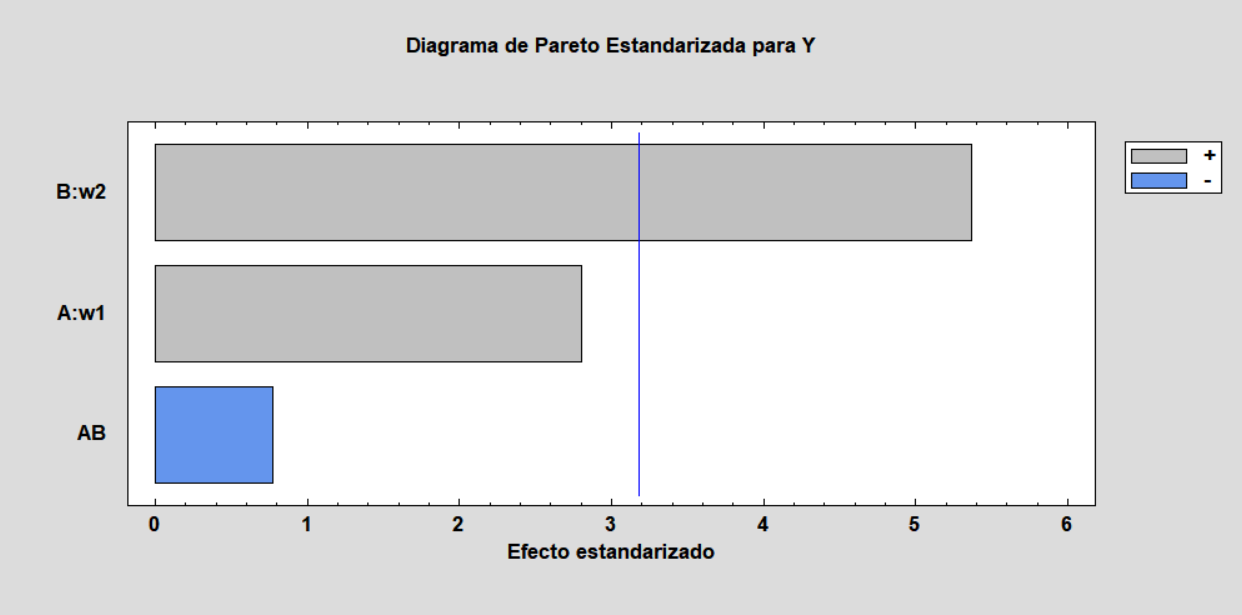

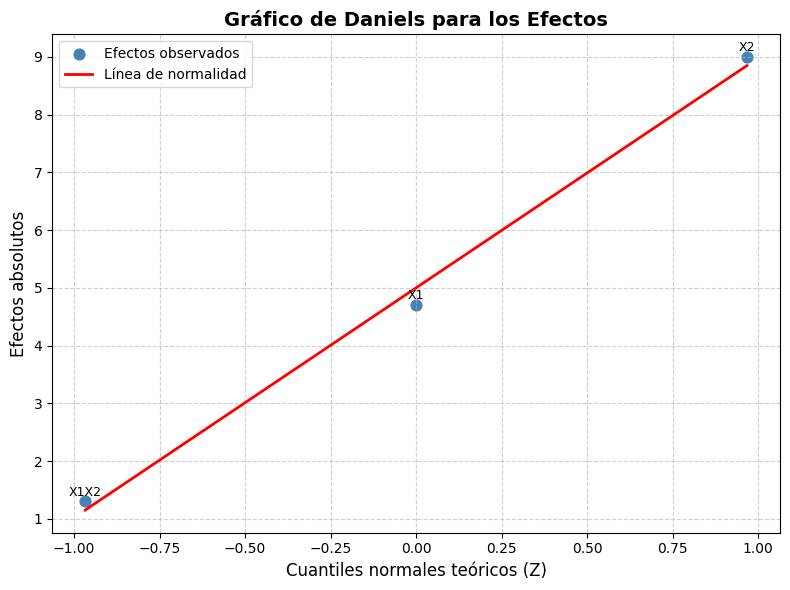

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Re-define the DataFrame 'df' and calculate effects_df to ensure it's available
data = {
    "W1": [70, 80, 70, 80, 75, 75, 75],
    "W2": [127.5, 127.5, 132.5, 132.5, 130.0, 130.0, 130.0],
    "X1": [-1, 1, -1, 1, 0, 0, 0],
    "X2": [-1, -1, 1, 1, 0, 0, 0],
    "Y":  [54.3, 60.3, 64.6, 68.0, 60.3, 64.3, 62.3]
}
df = pd.DataFrame(data)

# Filter for factorial points
df_factorial = df[(df['X1'] != 0) & (df['X2'] != 0)]

# Extract Y values for each factorial combination
Y_1 = df_factorial[(df_factorial['X1'] == -1) & (df_factorial['X2'] == -1)]['Y'].values[0]
Y_2 = df_factorial[(df_factorial['X1'] == 1) & (df_factorial['X2'] == -1)]['Y'].values[0]
Y_3 = df_factorial[(df_factorial['X1'] == -1) & (df_factorial['X2'] == 1)]['Y'].values[0]
Y_4 = df_factorial[(df_factorial['X1'] == 1) & (df_factorial['X2'] == 1)]['Y'].values[0]

# Calculate effects
Effect_X1 = (Y_2 + Y_4 - Y_1 - Y_3) / 2
Effect_X2 = (Y_3 + Y_4 - Y_1 - Y_2) / 2
Effect_X1X2 = (Y_4 + Y_1 - Y_2 - Y_3) / 2

effects_data = {
    'Effect': ['X1', 'X2', 'X1X2'],
    'Value': [Effect_X1, Effect_X2, Effect_X1X2]
}
effects_df = pd.DataFrame(effects_data)

# Ensure effects_df has 'Absolute_Value' and is sorted
if 'Absolute_Value' not in effects_df.columns:
    effects_df['Absolute_Value'] = effects_df['Value'].abs()
effects_df_sorted = effects_df.sort_values("Absolute_Value").reset_index(drop=True)

# Calcular las posiciones teóricas de probabilidad normal
n = len(effects_df_sorted)
prob = (np.arange(1, n + 1) - 0.5) / n
z = stats.norm.ppf(prob)  # valores teóricos z de la distribución normal

# ----------------------------
# Gráfico de Daniels
# ----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(z, effects_df_sorted["Absolute_Value"], color="steelblue", s=60, label="Efectos observados")

# Ajuste de línea (regresión lineal para la tendencia) - solo si hay suficientes puntos
if n > 1:
    m, b = np.polyfit(z, effects_df_sorted["Absolute_Value"], 1)
    plt.plot(z, m * z + b, color="red", linewidth=2, label="Línea de normalidad")

# Etiquetas de cada punto
for i, efecto in enumerate(effects_df_sorted["Effect"]):
    plt.text(z[i], effects_df_sorted["Absolute_Value"][i] + 0.1, efecto, fontsize=9, ha="center")

# ----------------------------
# Formato del gráfico
# ----------------------------
plt.title("Gráfico de Daniels para los Efectos", fontsize=14, weight="bold")
plt.xlabel("Cuantiles normales teóricos (Z)", fontsize=12)
plt.ylabel("Efectos absolutos", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Dataframe dado
data = {
    "W1": [70, 80, 70, 80, 75, 75, 75],
    "W2": [127.5, 127.5, 132.5, 132.5, 130.0, 130.0, 130.0],
    "X1": [-1, 1, -1, 1, 0, 0, 0],
    "X2": [-1, -1, 1, 1, 0, 0, 0],
    "Y":  [54.3, 60.3, 64.6, 68.0, 60.3, 64.3, 62.3]
}

df = pd.DataFrame(data)

# -----------------------
# 1. MODELO AJUSTADO
# -----------------------
df["X1X2"] = df["X1"] * df["X2"]      # interacción

X = df[["X1", "X2", "X1X2"]]
X = sm.add_constant(X)
y = df["Y"]

modelo = sm.OLS(y, X).fit()
SSE = sum(modelo.resid**2)           # Error total del modelo
df_e = modelo.df_resid                # grados de libertad del error

# -----------------------
# 2. ERROR PURO (solo puntos centrales)
# -----------------------
df_central = df[(df["X1"] == 0) & (df["X2"] == 0)]

# promedio de los centros
Yc_mean = df_central["Y"].mean()
SSPE = sum((df_central["Y"] - Yc_mean)**2)
df_pe = len(df_central) - 1

# -----------------------
# 3. SUMA DE CUADRADOS POR FALTA DE AJUSTE
# -----------------------
SSLOF = SSE - SSPE
df_lof = df_e - df_pe

# Estadístico F
F_lof = (SSLOF / df_lof) / (SSPE / df_pe)

# p-valor
p_value = 1 - stats.f.cdf(F_lof, df_lof, df_pe)

print("===== Prueba de Falta de Ajuste =====")
print(f"SSE (Error del modelo): {SSE:.4f}")
print(f"SSPE (Error puro): {SSPE:.4f}")
print(f"SSLOF (Falta de ajuste): {SSLOF:.4f}")
print(f"GL falta de ajuste: {df_lof}")
print(f"GL error puro: {df_pe}")
print(f"F = {F_lof:.4f}")
print(f"p-value = {p_value:.4f}")


===== Prueba de Falta de Ajuste =====
SSE (Error del modelo): 8.4286
SSPE (Error puro): 8.0000
SSLOF (Falta de ajuste): 0.4286
GL falta de ajuste: 1.0
GL error puro: 2
F = 0.1071
p-value = 0.7745


**Continuación del ejercicio**

Siguiendo la trayectoria de máximo crecimiento, el último punto con el que se
obtuvo una respuesta alta fue W1 = 90 y W2 = 145, por lo que en torno a éste se
corrió el siguiente diseño
| Condiciones reales | Condiciones reales | Condiciones codificadas | Condiciones codificadas |      |
|--------------------|--------------------|--------------------------|--------------------------|------|
| **W₁** | **W₂** | **X₁** | **X₂** | **Y** |
| 80 | 140 | -1 | -1 | 78.8 |
| 100 | 140 | 1  | -1 | 84.5 |
| 80 | 150 | -1 | 1  | 81.2 |
| 100 | 150 | 1  | 1  | 77.4 |
| 90 | 145 | 0  | 0  | 89.7|
| 90 | 145 | 0  | 0  | 86.8 |

In [ ]:
import pandas as pd

data = {
    "W1": [80, 100, 80, 100, 90, 90],
    "W2": [140, 140, 150, 150, 145, 145],
    "X1": [-1, 1, -1, 1, 0, 0],
    "X2": [-1, -1, 1, 1, 0, 0],
    "Y":  [78.8, 84.5, 81.2, 77.4, 89.7, 86.8]
}

df2 = pd.DataFrame(data)
df2


,W1,W2,X1,X2,Y
0,80,140,-1,-1,78.8
1,100,140,1,-1,84.5
2,80,150,-1,1,81.2
3,100,150,1,1,77.4
4,90,145,0,0,89.7
5,90,145,0,0,86.8


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

modelo1 = ols("Y ~ (X1+X2)**2", data = df2).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

           df     sum_sq    mean_sq         F    PR(>F)
X1        1.0   0.902500   0.902500  0.021284  0.897385
X2        1.0   5.522500   5.522500  0.130239  0.752739
X1:X2     1.0  22.562500  22.562500  0.532098  0.541589
Residual  2.0  84.805833  42.402917       NaN       NaN


In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Dataframe dado
data = {

    "W1": [80, 100, 80, 100, 90, 90],
    "W2": [140, 140, 150, 150, 145, 145],
    "X1": [-1, 1, -1, 1, 0, 0],
    "X2": [-1, -1, 1, 1, 0, 0],
    "Y":  [78.8, 84.5, 91.2, 77.4, 89.7, 86.8]
}

df = pd.DataFrame(data)

# -----------------------
# 1. MODELO AJUSTADO
# -----------------------
df["X1X2"] = df["X1"] * df["X2"]      # interacción

X = df[["X1", "X2", "X1X2"]]
X = sm.add_constant(X)
y = df["Y"]

modelo = sm.OLS(y, X).fit()
SSE = sum(modelo.resid**2)           # Error total del modelo
df_e = modelo.df_resid                # grados de libertad del error

# -----------------------
# 2. ERROR PURO (solo puntos centrales)
# -----------------------
df_central = df[(df["X1"] == 0) & (df["X2"] == 0)]

# promedio de los centros
Yc_mean = df_central["Y"].mean()
SSPE = sum((df_central["Y"] - Yc_mean)**2)
df_pe = len(df_central) - 1

# -----------------------
# 3. SUMA DE CUADRADOS POR FALTA DE AJUSTE
# -----------------------
SSLOF = SSE - SSPE
df_lof = df_e - df_pe

# Estadístico F
F_lof = (SSLOF / df_lof) / (SSPE / df_pe)

# p-valor
p_value = 1 - stats.f.cdf(F_lof, df_lof, df_pe)

print("===== Prueba de Falta de Ajuste =====")
print(f"SSE (Error del modelo): {SSE:.4f}")
print(f"SSPE (Error puro): {SSPE:.4f}")
print(f"SSLOF (Falta de ajuste): {SSLOF:.4f}")
print(f"GL falta de ajuste: {df_lof}")
print(f"GL error puro: {df_pe}")
print(f"F = {F_lof:.4f}")
print(f"p-value = {p_value:.4f}")

===== Prueba de Falta de Ajuste =====
SSE (Error del modelo): 41.3058
SSPE (Error puro): 4.2050
SSLOF (Falta de ajuste): 37.1008
GL falta de ajuste: 1.0
GL error puro: 1
F = 8.8230
p-value = 0.2067


In [ ]:
# @title **Cálculo de la configuración óptima para el modelo ajustado**

from scipy.optimize import minimize
import statsmodels.api as sm

# Asegurarse de que el modelo ajustado de la celda anterior esté disponible
# El DataFrame 'df' y el 'modelo' se crean en la celda 'Y3nEDjuCTj4I'
# Si esa celda no se ha ejecutado, deberías ejecutarla primero.

# Define la función que deseas maximizar (se antepone el signo - porque minimize busca el mínimo)
def funcion(x):
    # x[0] es X1, x[1] es X2
    # La función es la ecuación del modelo ajustado: Y = b0 + b1*X1 + b2*X2 + b3*X1*X2
    # Se asume que 'modelo' es el resultado del OLS de la celda anterior

    # Extraer los coeficientes del modelo
    b0 = modelo.params['const']
    b1 = modelo.params['X1']
    b2 = modelo.params['X2']
    b3 = modelo.params['X1X2']

    # Ecuación del modelo ajustado
    Y_pred = b0 + b1*x[0] + b2*x[1] + b3*x[0]*x[1]

    return -Y_pred # Negativo para maximizar

# Definir las restricciones de límite para X1 y X2 (variables codificadas)
# El rango de las variables codificadas es de -1 a 1
restricciones = [(-1, 1), (-1, 1)]

# Suprimir la salida de la optimización
# Se usa un punto central [0, 0] como valor inicial
res = minimize(funcion, [0, 0], method='SLSQP', bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print(f"X1 (codificado): {res.x[0]:.4f}")
print(f"X2 (codificado): {res.x[1]:.4f}")
print("Valor Máximo de Y (rendimiento predicho):", -res.fun) # Como minimizamos el negativo de la función

Resultado óptimo:
X1 (codificado): -1.0000
X2 (codificado): 1.0000
Valor Máximo de Y (rendimiento predicho): 92.95833333333337


**Continuación del ejercicio**

Dado que en el inciso anterior parece que el modelo de primer orden no describe
la superficie, se decide agregar seis tratamientos para completar un diseño de
composición central y de esta manera explorar ampliamente la región ex perimental para entender lo que pasa. Las corridas agre gadas y sus resultados se muestran a continuación:

| Condiciones reales | Condiciones reales | Condiciones codificadas | Condiciones codificadas |      |
|--------------------|--------------------|--------------------------|--------------------------|------|
| **W₁** | **W₂** | **X₁** | **X₂** | **Y** |
| 76 | 145 | -1.41 | 0 | 83.3 |
| 104 | 145 | 1.41  | 0 | 81.2 |
| 90 | 138 | 0 | -1.41  | 81.2 |
| 90 | 152 | 0  | 1.41  | 77.4 |
| 90 | 145 | 0  | 0  | 89.7|
| 90 | 145 | 0  | 0  | 86.8 |

In [ ]:
import pandas as pd

data = {
    "W1": [76, 104, 90, 90, 90, 90],
    "W2": [145, 145, 138, 152, 145, 145],
    "X1": [-1.41, 1.41, 0, 0, 0, 0],
    "X2": [0, 0, -1.41, 1.41, 0, 0],
    "Y":  [83.3, 81.2, 81.2, 79.5, 87.0, 86.0]
}

df3 = pd.DataFrame(data)
df3

,W1,W2,X1,X2,Y
0,76,145,-1.41,0.00,83.3
1,104,145,1.41,0.00,81.2
2,90,138,0.00,-1.41,81.2
3,90,152,0.00,1.41,79.5
4,90,145,0.00,0.00,87.0
5,90,145,0.00,0.00,86.0


In [ ]:
import pandas as pd

# Re-define df2 here to ensure it's available
data_df2 = {
    "W1": [80, 100, 80, 100, 90, 90],
    "W2": [140, 140, 150, 150, 145, 145],
    "X1": [-1, 1, -1, 1, 0, 0],
    "X2": [-1, -1, 1, 1, 0, 0],
    "Y":  [78.8, 84.5, 91.2, 77.4, 89.7, 86.8]
}
df2 = pd.DataFrame(data_df2)

# df3 should be available from the previous cell, but re-defining for self-containment as well
data_df3 = {
    "W1": [76, 104, 90, 90, 90, 90],
    "W2": [145, 145, 138, 152, 145, 145],
    "X1": [-1.41, 1.41, 0, 0, 0, 0],
    "X2": [0, 0, -1.41, 1.41, 0, 0],
    "Y":  [83.3, 81.2, 81.2, 79.5, 87.0, 86.0]
}
df3 = pd.DataFrame(data_df3)

# Concatenar df2 y df3 para formar el DataFrame completo del Diseño Compuesto Central (DCC)
df_ccd = pd.concat([df2, df3], ignore_index=True)

print("DataFrame del Diseño Compuesto Central (df_ccd):")
print(df_ccd)

DataFrame del Diseño Compuesto Central (df_ccd):
     W1   W2    X1    X2     Y
0    80  140 -1.00 -1.00  78.8
1   100  140  1.00 -1.00  84.5
2    80  150 -1.00  1.00  91.2
3   100  150  1.00  1.00  77.4
4    90  145  0.00  0.00  89.7
5    90  145  0.00  0.00  86.8
6    76  145 -1.41  0.00  83.3
7   104  145  1.41  0.00  81.2
8    90  138  0.00 -1.41  81.2
9    90  152  0.00  1.41  79.5
10   90  145  0.00  0.00  87.0
11   90  145  0.00  0.00  86.0


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

modelo1 = ols("Y ~ (X1+X2)**2", data = df_ccd).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

           df      sum_sq    mean_sq         F    PR(>F)
X1        1.0   15.338848  15.338848  1.217143  0.302000
X2        1.0    1.056569   1.056569  0.083839  0.779523
X1:X2     1.0   95.062500  95.062500  7.543240  0.025195
Residual  8.0  100.818749  12.602344       NaN       NaN


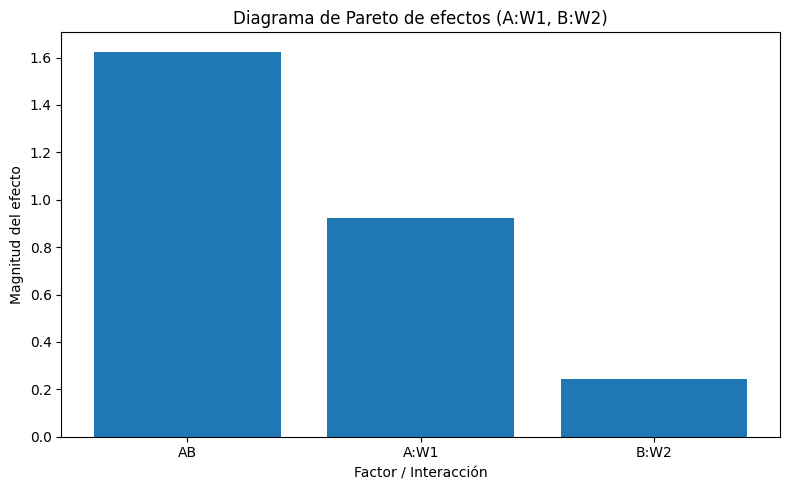

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurar que df ya existe (de la celda anterior)
# df contiene: W1, W2, X1, X2, Y

# ---------------------------------------------------
# 1. Calcular efectos principales e interacción
# ---------------------------------------------------
effects = {}

# Efecto de X1
effects["A:W1"] = abs((df_ccd["X1"] * df_ccd["Y"]).mean())

# Efecto de X2
effects["B:W2"] = abs((df_ccd["X2"] * df_ccd["Y"]).mean())

# Efecto de interacción X1 * X2
effects["AB"] = abs((df_ccd["X1"] * df_ccd["X2"] * df_ccd["Y"]).mean())

# ---------------------------------------------------
# 2. Ordenar efectos para Pareto
# ---------------------------------------------------
sorted_effects = dict(sorted(effects.items(), key=lambda x: x[1], reverse=True))

labels = list(sorted_effects.keys())
values = list(sorted_effects.values())

# ---------------------------------------------------
# 3. Graficar diagrama de Pareto
# ---------------------------------------------------
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title("Diagrama de Pareto de efectos (A:W1, B:W2)")
plt.xlabel("Factor / Interacción")
plt.ylabel("Magnitud del efecto")
plt.tight_layout()
plt.show()


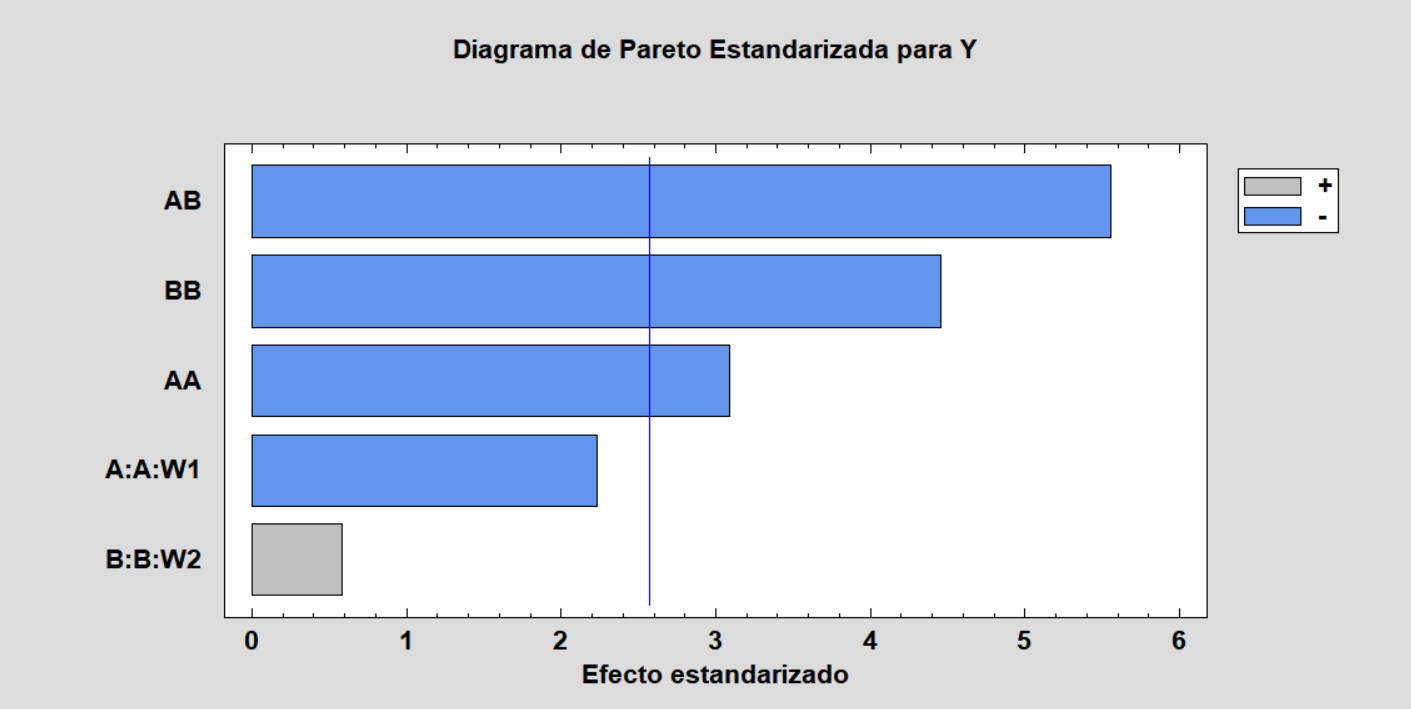

In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Dataframe dado
df_f = pd.DataFrame(data_df3)

# -----------------------
# 1. MODELO AJUSTADO
# -----------------------
df_f["X1X2"] = df_f["X1"] * df_f["X2"]      # interacción

X = df_f[["X1", "X2", "X1X2"]]
X = sm.add_constant(X)
y = df_f["Y"]

modelo = sm.OLS(y, X).fit()
SSE = sum(modelo.resid**2)           # Error total del modelo
df_e = modelo.df_resid                # grados de libertad del error

# -----------------------
# 2. ERROR PURO (solo puntos centrales)
# -----------------------
df_central = df_f[(df["X1"] == 0) & (df_f["X2"] == 0)]

# promedio de los centros
Yc_mean = df_central["Y"].mean()
SSPE = sum((df_central["Y"] - Yc_mean)**2)
df_pe = len(df_central) - 1

# -----------------------
# 3. SUMA DE CUADRADOS POR FALTA DE AJUSTE
# -----------------------
SSLOF = SSE - SSPE
df_lof = df_e - df_pe

# Estadístico F
F_lof = (SSLOF / df_lof) / (SSPE / df_pe)

# p-valor
p_value = 1 - stats.f.cdf(F_lof, df_lof, df_pe)

print("===== Prueba de Falta de Ajuste =====")
print(f"SSE (Error del modelo): {SSE:.4f}")
print(f"SSPE (Error puro): {SSPE:.4f}")
print(f"SSLOF (Falta de ajuste): {SSLOF:.4f}")
print(f"GL falta de ajuste: {df_lof}")
print(f"GL error puro: {df_pe}")
print(f"F = {F_lof:.4f}")
print(f"p-value = {p_value:.4f}")

===== Prueba de Falta de Ajuste =====
SSE (Error del modelo): 40.1633
SSPE (Error puro): 0.5000
SSLOF (Falta de ajuste): 39.6633
GL falta de ajuste: 2.0
GL error puro: 1
F = 39.6633
p-value = 0.1116


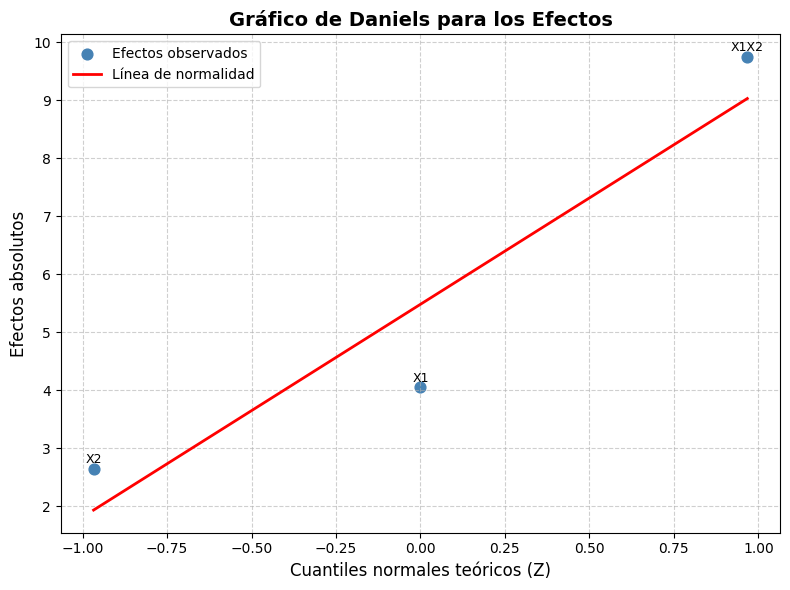

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Re-define the DataFrame 'df' and calculate effects_df to ensure it's available

df = pd.DataFrame(df_ccd)

# Filter for factorial points
df_factorial = df[(df['X1'] != 0) & (df['X2'] != 0)]

# Extract Y values for each factorial combination
Y_1 = df_factorial[(df_factorial['X1'] == -1) & (df_factorial['X2'] == -1)]['Y'].values[0]
Y_2 = df_factorial[(df_factorial['X1'] == 1) & (df_factorial['X2'] == -1)]['Y'].values[0]
Y_3 = df_factorial[(df_factorial['X1'] == -1) & (df_factorial['X2'] == 1)]['Y'].values[0]
Y_4 = df_factorial[(df_factorial['X1'] == 1) & (df_factorial['X2'] == 1)]['Y'].values[0]

# Calculate effects
Effect_X1 = (Y_2 + Y_4 - Y_1 - Y_3) / 2
Effect_X2 = (Y_3 + Y_4 - Y_1 - Y_2) / 2
Effect_X1X2 = (Y_4 + Y_1 - Y_2 - Y_3) / 2

effects_data = {
    'Effect': ['X1', 'X2', 'X1X2'],
    'Value': [Effect_X1, Effect_X2, Effect_X1X2]
}
effects_df = pd.DataFrame(effects_data)

# Ensure effects_df has 'Absolute_Value' and is sorted
if 'Absolute_Value' not in effects_df.columns:
    effects_df['Absolute_Value'] = effects_df['Value'].abs()
effects_df_sorted = effects_df.sort_values("Absolute_Value").reset_index(drop=True)

# Calcular las posiciones teóricas de probabilidad normal
n = len(effects_df_sorted)
prob = (np.arange(1, n + 1) - 0.5) / n
z = stats.norm.ppf(prob)  # valores teóricos z de la distribución normal

# ----------------------------
# Gráfico de Daniels
# ----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(z, effects_df_sorted["Absolute_Value"], color="steelblue", s=60, label="Efectos observados")

# Ajuste de línea (regresión lineal para la tendencia) - solo si hay suficientes puntos
if n > 1:
    m, b = np.polyfit(z, effects_df_sorted["Absolute_Value"], 1)
    plt.plot(z, m * z + b, color="red", linewidth=2, label="Línea de normalidad")

# Etiquetas de cada punto
for i, efecto in enumerate(effects_df_sorted["Effect"]):
    plt.text(z[i], effects_df_sorted["Absolute_Value"][i] + 0.1, efecto, fontsize=9, ha="center")

# ----------------------------
# Formato del gráfico
# ----------------------------
plt.title("Gráfico de Daniels para los Efectos", fontsize=14, weight="bold")
plt.xlabel("Cuantiles normales teóricos (Z)", fontsize=12)
plt.ylabel("Efectos absolutos", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()